# Assignment 2

## Q1 - Numerical Simulation


---

It is recommended that you read the Python 2 Manual posted to eClass. The first step is to complete the skeleton code below by filling in the initial values, the simulation parameters, and adjusting the velocity equation in the simulation section to account for air resistance. Most of the code is there for you, but you'll need to enter some reasonable values for the initial values and simulation parameters; you'll want to make sure you see a straight line in the height vs. time plot which represents terminal velocity. We also want to simulate a system that has air resistance, so you'll need to translate the equations of motion for a system with air resistance into code. Ultimately, only the equation of motion for the acceleration needs to be updated from what is below. You could also add a constant to represent the drag to make it easier to change. The equation for vy below only accounts for gravity. Assuming that air resistance is proportional to the velocity (a reasonable assumption according to D. Morin), then $a_y = -g -  \alpha v_i$, where $\alpha$ has units of 1/s. You'll have to do some rearrangement to find $v_{y,f}$ where $a_y = \frac{v_{y,f} - v_{y,i}}{h}$. You can again assume that we want it in terms of $v_{y,i}$ since that's a value we already know. The code to plot the height as a function of time has been left in so that you know whether your simulation worked or not. A reasonable value for $\alpha$ might be around 0.5/s but the exact value doesn't matter.}

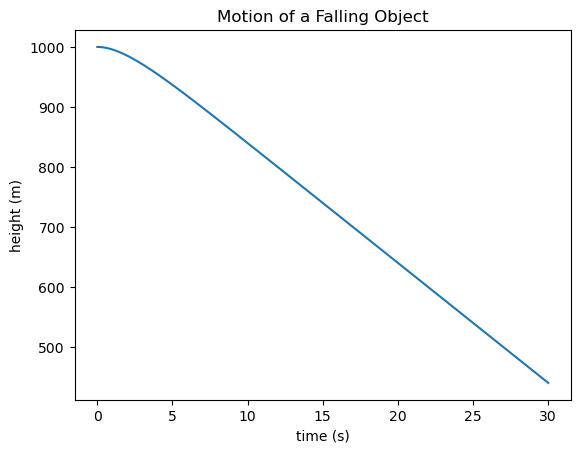

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt

# Initial Values
y0 = 1000 # Initial position in metres
vy0 = 0 # Initial velocity in m/s
a = 10 # Acceleration due to gravity in m/s^2; constant here
alpha = 0.5 # Proportionality constant for simulating air resistance in 1/s

# Simulation Parameters
h = 0.001 # Time step in the simulation; smaller numbers are more accurate
maxTime = 30 # Simulation will end at this time in seconds

# Initialize Variables
i = 0 # Current index in the arrays
time = np.zeros(int(maxTime/h)+1) # Array to store the time values
y = np.zeros(int(maxTime/h)+1) # Array to store the position at each time
vy = np.zeros(int(maxTime/h)+1) # Array to store the velocity at each time
y[0] = y0
vy[0] = vy0

# Simulation
while(i < int(maxTime/h)):
    if(y[i] <= 0): vy[i] = -0.8 * vy[i]
    y[i+1] = vy[i] * h + y[i] # Update equation for y
    vy[i+1] = (- a - alpha * vy[i]) * h + vy[i] # Update equation for vy
    time[i+1] = time[i] + h
    i += 1

# Plotting
plt.plot(time, y)
plt.title('Motion of a Falling Object')
plt.xlabel('time (s)')
plt.ylabel('height (m)')
plt.show()

## Q2 - Adding a Twist


---

One of the great things about a numerical simulation is that you can easily adjust it to account for new physics. Uncomment the line `if(y[i] <= 0): vy[i] = -0.8 * vy[i]` near the beginning of the `while` loop in the above code. If you're feeling particularly ambitious, make a guess as to what will happen to the projectile. Keep in mind `y` is height and `vy` is velocity. Then, whether you've made a guess or not, run the code to see what happens.

In words, describe what you see and what you think is happening to the projectile. Describe what each part of that line of code is doing.

**Prediction**
The line of code seems to check if the y-position of the projectile at the current timestep is at or below 0. If the projectile is at 0 then it will negate the velocity and scale it by 0.8. In practice, this seems to simulate the particle colliding with the line y = 0.

**Description**
When uncommented, the height-time graph of the projectile now "bounces" whenever it is at or below y=0. This behaviour simulates a 1D collision between the projectile and the ground at y=0, with a coefficient of restitution of e=0.8 The line of code begins with a condition to check whether the height of the projectile at the current timestep is at or below 0. If the condition passes then the velocity at the current timestep is negated (to change the direction of the projectile) and dampened by 0.8 (to simulate the non-perfectly elastic collision between the particle and the ground)

## Q3 - Plotting Height and Velocity


---

Plot both height vs. time and velocity vs. time on the same graph.

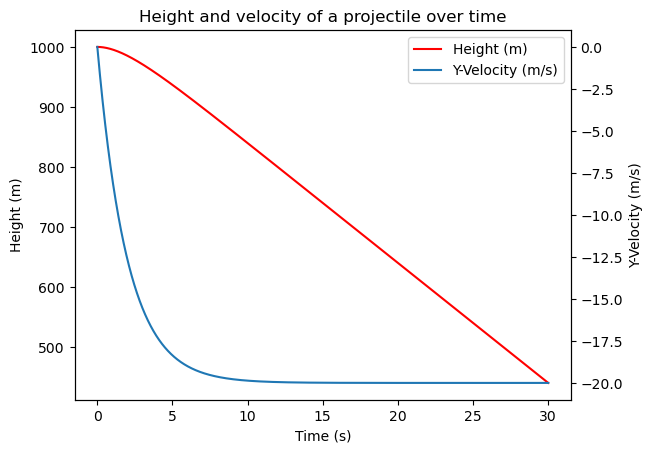

In [2]:
fig, pos_axis = plt.subplots()
vel_axis = pos_axis.twinx()

# Plot height vs. time
y_plot, = pos_axis.plot(time, y, color="red", label="Height (m)")
pos_axis.set_ylabel("Height (m)")

# Plot velocity vs. time
vy_plot, = vel_axis.plot(time, vy, label="Y-Velocity (m/s)")
vel_axis.set_ylabel("Y-Velocity (m/s)")

pos_axis.set_xlabel("Time (s)")
pos_axis.legend(handles=[y_plot, vy_plot])
plt.title("Height and velocity of a projectile over time")
plt.show()

## Q4 - Simulation vs. Idealized Solution


---

Another interesting thing we can do is to plot our simulation against the idealized version. Create a function that takes time, initial height, and initial velocity as arguments, and returns the value of the equation of motion without air resistance. Ultimately, you should have that $y(t) = y_0 + v_y * t + 1/2 a * t^2$. There's also good information in the PHYS 144 chapters posted to eClass.

Now, on the same graph, plot both your simulated height vs. time and the idealized height vs. time. The times have already been calculated for you in the simulation. You should use the same initial height and initial velocity you currently have set in the simulation.

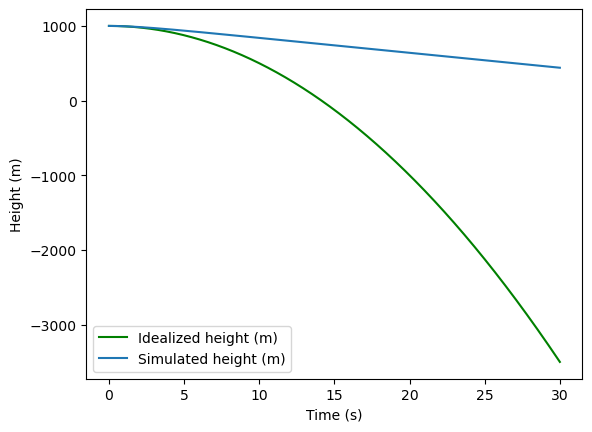

In [3]:
def ideal_y(t, y0, vy0):
    """
    Calculates the height of a projectile with starting height y0, and initial velocity v0 after t seconds.
    Follows the formula y(t) = y_0 + v_y * t + (1/2) * a * t^2
    t       - Elapsed time in seconds
    y0      - Initial height of the projectile
    vy0     - Initial velocity of the projectile
    returns - Final height of the projectile
    """
    return y0 + vy0 * t + (1/2) * -a * (t**2) # Negate a to keep same direction as simulation

y_ideal = np.array([ideal_y(t, y0, vy0) for t in time])

plt.plot(time, y_ideal, color="green", label="Idealized height (m)")
plt.plot(time, y, label="Simulated height (m)")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.show()

## Q5 - Advanced Simulations and Plotting


---

### Background

While you won't have to write your own code, the MAT file "Q5 Data" on eClass contains the results of an electromagnetism simulation. Rather than an initial-value problem (IVP) like you solved in Q1, this is a boundary-value problem (BVP). We specify certain boundary conditions like "the derivative of magnetic field strength with respect to time is 0 along the line y = 0". We specify the differential equations that describe the physical system, set up some 2D arrays (instead of 1D like `s` and `r` above) and let the algorithm crunch out what the values should be in our grid. Technically, this simulation used the Finite Element Method (FEM) where we create a mesh of triangles and calculate the value in each triangle, but the idea is the same. One problem with using a grid of rectangles is it's hard to properly represent circles. The mesh used to solve the system is shown in the lab manual. However, the data in the MAT file has been sampled on a regular grid for convenience.

The physical system we were modelling is a sheet of conductive paper that has two long, straight electrodes painted on either side with silver paint, and an annulus between them (also in silver paint). Using a power supply, one straight electrode is held at 4.5 V, and the other at 0 V. The silver ring in the middle is left alone. We can then use a multimeter to measure the voltage anywhere on the surface of the paper. We then compared it to a simulation and found that it matched very closely!

In the lab manual, there is a contour plot overlaid with a stream plot of this simulation. The grey dashed lines show where the silver paint would have been on the actual sheet. The bands of colour indicate the general voltage in that region, and the solid, dark grey lines between each colour band are called equipotential lines. The voltage is exactly the same anywhere on a given line. The black stream arrows on top allow you to visualize the direction of the electric field. It's quite interesting that no field lines penetrate the silver ring in the middle! There are very good physical reasons for that as you'll learn in your EM courses.

### Assignment

Import the data from "Q5 Data.mat" on eClass. We have already imported `scipy.io as sio` so that we can use SciPy's `loadmat` function. Unfortunately, the CSVs we've been using up to now are not well-suited for 3D matrices of data. If you print your data after importing it, you may notice that there's a header followed by some data. However, the MAT file is being stored as a dictionary rather than a list, so we can't just index into it using `myData[0]` or `myData[1]`; we need to use the correct key instead as in `myData['correctKey']`. Dictionaries will tell you what keys are stored in them if you use `myData.keys()`. Look at the keys available to you, and use the correct key to store just the data array to a new variable. This is now a regular matrix and you can index into it as you usually would. `myMatrix[0, 0]` should get you a list in the form `[x, y, z]` where *x* and *y* are just the *x* and *y* coordinates on the sheet of paper, and *z* is the voltage at that point.

Plot a 3D surface plot of the data and a contour plot of the data. You can use either `plt.contour` or `plt.contourf` for the contour plot, but contourf is more fun to look at. Because the data array pulled from the MAT file is an M * N * 3 matrix, if we slice it correctly, we can get the three, 2D matrices that we need as both types of plots are expecting three arguments—X, Y, and Z—each of which is a 2D matrix. We don't require axis labels this time for either plot, though you may want to try adding them.

Surface Plot: https://matplotlib.org/stable/gallery/mplot3d/surface3d_2.html

Contour Plot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html




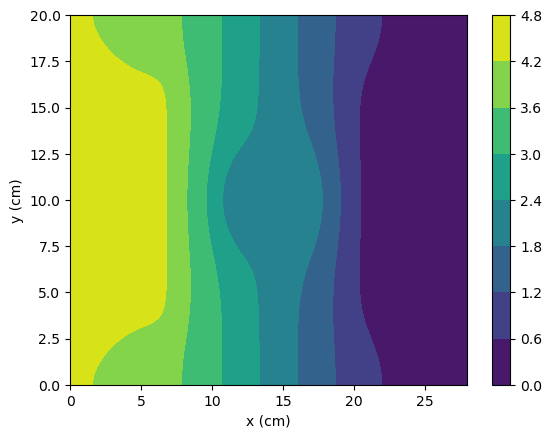

In [90]:
import scipy.io as sio
data = sio.loadmat("Q5 Data.mat")['Expression1']
x = data[:, :, 0]
y = data[:, :, 1]
voltage = data[:, :, 2] # z points (value at (x, y))


plt.contourf(x, y, voltage)
plt.colorbar()
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()

## Q6 - References and Acknowledgements


---

List any references used and acknowledge anyone you worked with or who helped you with the assignment. If you need to acknowledge someone, make sure to acknowledge how each person contributed. If you have no references or acknowledgements, just put "None".

“Multiple y-axis with Spines — Matplotlib 3.9.0 documentation,” matplotlib.org. https://matplotlib.org/stable/gallery/spines/multiple_yaxis_with_spines.html

“Plots with different scales — Matplotlib 3.8.2 documentation,” matplotlib.org. https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html